In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    "Modelo": ["Regresión Logística", "KNN", "Random Forest", "XGBoost"],
    "Accuracy": [0.827, 0.913, 0.963, 0.959],
    "F1-weighted": [0.826, 0.913, 0.963, 0.959],
    "Recall clase 1": [0.769, 0.886, 0.941, 0.944],
    "Precision clase 1": [0.824, 0.912, 0.974, 0.962],
})

df_long = df.melt(id_vars="Modelo", var_name="Métrica", value_name="Score")
model_order = df.sort_values("Precision clase 1", ascending=False)["Modelo"].tolist()
metric_order = ["Precision clase 1", "Accuracy", "F1-weighted", "Recall clase 1"]

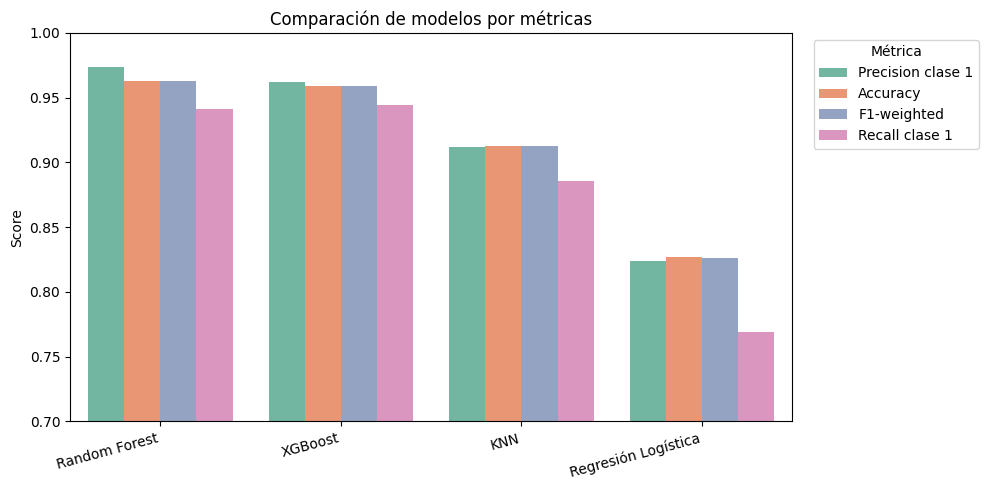

In [3]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=df_long,
    x="Modelo",
    y="Score",
    hue="Métrica",
    order=model_order,
    hue_order=metric_order,
    palette="Set2",
)
ax.set_title("Comparación de modelos por métricas")
ax.set_xlabel("")
ax.set_ylabel("Score")
ax.set_ylim(0.70, 1.00)
plt.xticks(rotation=15, ha="right")
plt.legend(title="Métrica", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

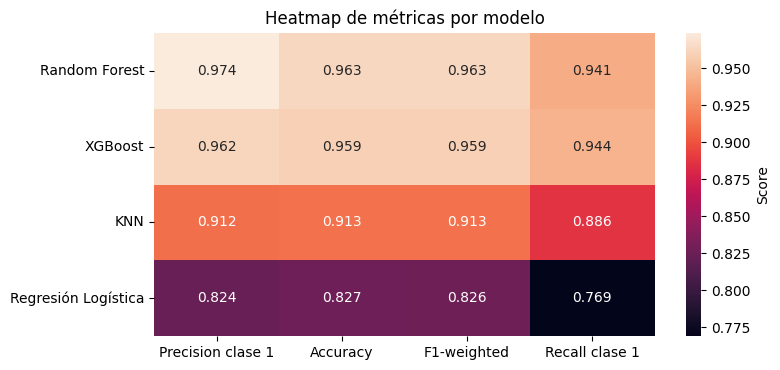

In [4]:
plt.figure(figsize=(8, 3.8))
heat = df.set_index("Modelo").loc[model_order, metric_order]
ax = sns.heatmap(
    heat,
    annot=True,
    fmt=".3f",
    cbar_kws={"label": "Score"}
)
ax.set_title("Heatmap de métricas por modelo")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()
plt.show()

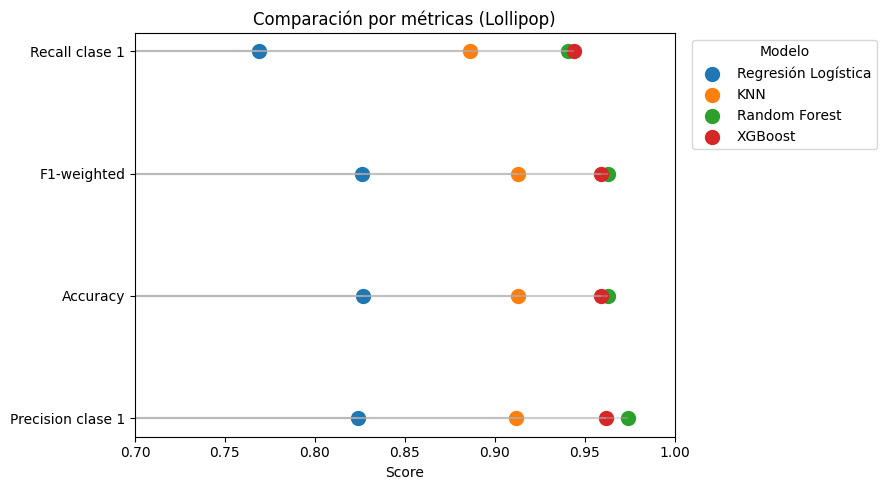

In [5]:
df_long2 = df_long.copy()
df_long2["Métrica"] = pd.Categorical(df_long2["Métrica"], categories=metric_order, ordered=True)
df_long2 = df_long2.sort_values("Métrica")

plt.figure(figsize=(9, 5))

for model in df_long2["Modelo"].unique():
    subset = df_long2[df_long2["Modelo"] == model]
    plt.hlines(
        y=subset["Métrica"],
        xmin=0.70,
        xmax=subset["Score"],
        alpha=0.4,
        color='#B0B0B0'
    )
    plt.scatter(
        subset["Score"],
        subset["Métrica"],
        s=100,
        label=model
    )

plt.xlim(0.70, 1.00)
plt.title("Comparación por métricas (Lollipop)")
plt.xlabel("Score")
plt.ylabel("")
plt.legend(title="Modelo", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()